# Scikit-Learn

It is used to machine learning modules, to make predictions and evaluate prediction whether good or bad.

### Why Scikit-Learn
* built on Numpy and Matplotlib
* has many inbuilt machine learning models
* method to evalute machine models
* well-designed API

### Workflow
1. Get data ready
2. Pick the right estimator/algorithm
3. Fitting model to data to make prediction
4. Evaluate model
5. Improve through evaluation
6. Saved trained model

![workflow](flow.png)

In [1]:
import numpy as np

**Get data ready**

In [2]:
# get data ready
import pandas as pd

data = pd.read_csv("heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create features datas

x = data.drop("target", axis=1)

# create labels
y = data.target

In [4]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# Choose Modules and Hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) # clf means classifier, sometimes 'model' is used instead of clf

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Fit model to the training data**

In [7]:
# fit model to the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
# Make a prediction 

y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [10]:
y_test

69     1
124    1
1      1
25     1
250    0
      ..
97     1
73     1
264    0
206    0
258    0
Name: target, Length: 61, dtype: int64

**Evalute the model**

In [11]:
# Evaluate the model

clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.819672131147541

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 7, 27]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.819672131147541

**Improving Models**

In [16]:
# Improve the Model
# To improve, you can try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f'Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}% \n')

Trying model with 10 estimators...
Model accuracy on test set: 85.25% 

Trying model with 20 estimators...
Model accuracy on test set: 80.33% 

Trying model with 30 estimators...
Model accuracy on test set: 81.97% 

Trying model with 40 estimators...
Model accuracy on test set: 81.97% 

Trying model with 50 estimators...
Model accuracy on test set: 77.05% 

Trying model with 60 estimators...
Model accuracy on test set: 78.69% 

Trying model with 70 estimators...
Model accuracy on test set: 77.05% 

Trying model with 80 estimators...
Model accuracy on test set: 81.97% 

Trying model with 90 estimators...
Model accuracy on test set: 81.97% 



**Save a Model**

In [17]:
# Save a model and load it
import pickle

pickle.dump(clf, open("random_forst_model1.pkl", "wb")) 
# wb means write binary

**Load a Model**

In [18]:
loaded_model = pickle.load(open("random_forst_model1.pkl", "rb"))
# rb means read binary
loaded_model.score(x_test, y_test)

0.819672131147541

### Recap

# 1. Getting data ready to be used with machine learning

Three main things to do:

    1. Split the data into features and labels (usually `X` & `y`)
    
    2. Filling (also called imputting) or disregarding missing values
    
    3. Converting non-numerical values to numericals values (also called feature encoding)

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# features
X = data.drop("target",axis=1) 

# label 
y = data.target

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
#1.1 Split the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

**242 is the 80% of the train data i.e 20% is the test data equivalent to 61**

## Data Science quick tips

![tip](tips.png)

#### 1.1.1 Making all data numerical

In [25]:
car_sales = pd.read_csv("scikit-learn-data/car-sales-extended.csv")
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# split into X,y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, x_test = train_test_split(X,y,test_size=0.2)

In [29]:
# Turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

![encode](images/encoding.PNG)

In [30]:
# N.B: Doors is included as categorical because it can be grouped. As in:
# There are 856 cars with 4 doors, 79 with 5 doors and 65 with 3 doors

car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
# refit model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

# build machine learning model

from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor to predict number (price)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

In [33]:
model.score(X_test, y_test)

0.3235867221569877

#### 1.1.2 If there were missing values

* Fill them with some values known as imputation
* Remove the sample with missig data altogether

In [34]:
car_sales = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
# to know how many missing values

car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# Create X and y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [37]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [38]:
# Convert all dataset to number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [39]:
car_sales["Make"].fillna("missing", inplace=True)
car_sales["Colour"].fillna("missing", inplace=True)
car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(), inplace=True)
car_sales["Doors"].fillna(4, inplace=True)

In [40]:
car_sales["Doors"].value_counts()

4.0    861
5.0     75
3.0     64
Name: Doors, dtype: int64

In [41]:
# verify if there is still missing value

car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

**N.B: Do not replace the NaN in price with average, instead remove the missing data. Since it is the dataset to be predicted.**

In [42]:
# Remove missing data

car_sales.dropna(inplace=True)

In [43]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
len(car_sales)

950

In [45]:
X = car_sales.drop("Price", axis= 1)
y = car_sales["Price"]

In [46]:
# Convert all dataset to number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Filling missing values with Sklearn

In [47]:
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# Fill missing values with scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numeric with "mean"
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define column
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (somethings that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [53]:
# Convert all dataset to number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X;

In [54]:
# Fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

# 2. Choosing the right Estimator/Algorithm for our problem.

Scikit-Learn uses estimator as another term for machine learning model or algorithm. To select an algorithm to use, you have to figure the kind of problem

* **Classification:** predicting whether a sample is one thing or the other e.g predicting whether someone has a heart disease or not.

* **Regression:** predicting a number. e.g predicting car price.

Steps to note:

    1. Check the Sklearn Machine Learning Map.
    2. If you have structured data, use ensemble methods. (e.g Tables)
    3. If you have unstructured data, use deep learning or transfer learning. (e.g Images, text, audio)

**Scikit-Learn Machine Learning Map**

![sklean_algo](images/algo.PNG)

### 2.1 Choosing a machine learning model for a regression problem



In [55]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [56]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["TARGET"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
# How many samples?
len(boston_df)

506

In [58]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# instantiate ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.666222167016852

**To Improve the test score, try random Forest Regressor**

In [59]:
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

# split to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# check the score of the RandomForestRegressor
rf.score(X_test, y_test)

0.8654448653350507

### 2.2 Choosing a machine learning model for a Classification problem

In [60]:
heart_diseases = pd.read_csv("heart-disease.csv")
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_diseases)

303

In [62]:
# Import the linearSCV estimator class

from sklearn.svm import LinearSVC

# Setup  random seed
np.random.seed(42)

# Make the data
X = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]

# Split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate linearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [63]:
# improve the score using RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Feature and Label
np.random.seed(42)
X = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]

# Split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

0.8524590163934426

# 3. Fitting the Model to make prediction on data

### 3.1 Fitting Model to the data

Different names for:

    X = features, features variables, data
    
    y = labels, targets, target variables

In [64]:
# improve the score using RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Feature and Label
np.random.seed(42)
X = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]

# Split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

0.8524590163934426

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make Prediction using s machine learning model

Two ways to make prediction:
    
    1.  predict()
    
    2. predict_proba()

In [66]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [67]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [70]:
clf.score(X_test, y_test)

0.8524590163934426

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [72]:
# Make prediction with `predict_proba`

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [73]:
# Using predict()
# predict() returns the index of predict_proba()

clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models.

In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make prediction
y_preds = model.predict(X_test)

In [75]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [76]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [77]:
# Compare the predictions

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# 4. Evaluating a Model

Three ways to evaluate Scikit-Learn Model:
    
    1. Estimator score method.
    2. The scoring parameter.
    3. Problem-specific metric functions.

In [78]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_diseases.drop("target", axis =1)
y = heart_diseases["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

### 4.1 Evaluating using `score` method

In [79]:
clf.score(X_test, y_test)

0.8524590163934426

In [80]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model = RandomForestRegressor().fit(X_train, y_train)

In [81]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating the model using `scoring` parameter

In [82]:
from sklearn.model_selection import cross_val_score
# cross validation score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train);

In [83]:
clf.score(X_test, y_test)

0.8524590163934426

In [84]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [85]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation
clf_cross_val = np.mean(cross_val_score(clf, X, y))

# compare the two
clf_single_score, clf_cross_val

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [86]:
from sklearn.model_selection import cross_val_score
# cross validation score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = np.mean(cross_val_score(clf, X, y))

In [87]:
print(f'Heart Disease Classifier Accuracy: {cross_val_score * 100:.2f}%')

Heart Disease Classifier Accuracy: 82.15%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

Roc curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# Make prediction with probabilites
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.05, 0.95],
        [0.1 , 0.9 ],
        [0.79, 0.21],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.76, 0.24],
        [0.19, 0.81],
        [0.62, 0.38],
        [0.99, 0.01]]),
 61)

In [89]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [90]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

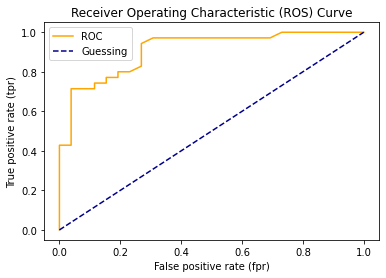

In [91]:
# create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROS) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

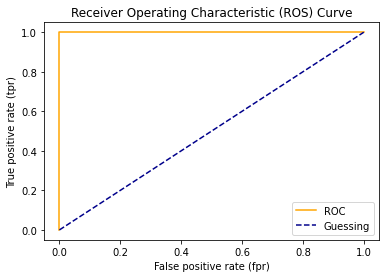

In [93]:
# plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [95]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a more predicts and the actual labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused.

In [96]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [97]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,21,5
1,8,27


In [98]:
len(X_test)

61

In [99]:
21 + 5 + 8 + 27

61

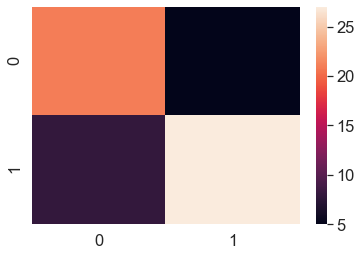

In [101]:
# make confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

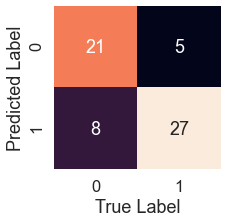

In [103]:
def plot_conf_mat(conf_mat):
    '''
    Plot a confusion matrix using seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot = True, cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

![confusion-matrix](images/confusion-matrix.PNG)

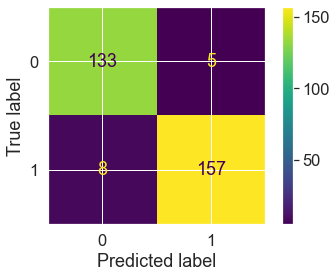

In [105]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

**Classification Report**

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [110]:
# where precision and recall become valuable

disease_true =np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


![classification](images/classification.PNG)

### 4.2.2 Regression model evaluation metrics

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2:** What R-squared does is to compare your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.

For example, if all your model does is predict the mean of the targets, it is R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [111]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.8654448653350507

In [112]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [113]:
y_test.mean()

21.488235294117654

In [115]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [116]:
r2_score(y_test, y_test)

1.0